In [ ]:
# Bellevue University
# DSC530 Data Exploration and Analysis
# Final Project
# By: Tai Ngo
# Date: 2/29/2020

from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import random
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import thinkstats2
import thinkplot

In [101]:
df = pd.read_csv(r'C:\Users\Tai\Desktop\DSC 530 Final Project\growth_tech_stocks.csv')
# the link to download the csv file is https://www.kaggle.com/fjgonzalez/growth-technology-stocks/data#

In [102]:
# Renaming the column names
df = df.rename(columns={'Unnamed: 0': 'Symbol', 'Unnamed: 1': 'Date',  'high': 'Highest Price', 'low': 'Lowest Price', 'open': 'Open','volume': 'Volume'})
df.head(5)
# 5 variables are Symbol, Highest Price, Lowest Price, Open and Volume
# Symbol means the ticker of each stock. Investors rely on the ticker to look up the stock of a company on the stock market.
# Highest Price is the highest price of a stock on a given day.
# Lowest Price is the lowest price of a stock on a given day.
# Open is the price of the stock when the stock market just opens.
# Volume is the amount of stocks being traded on a given day.

,Symbol,Date,close,Highest Price,Lowest Price,Open,Volume
0,IQ,3/15/2019,27.02,27.2200,25.95,25.98,9512936
1,IQ,3/18/2019,27.42,28.0000,26.54,27.27,9735792
2,IQ,3/19/2019,27.33,27.9200,27.12,27.50,7295904
3,IQ,3/20/2019,26.41,27.1500,25.36,27.03,13875382
4,IQ,3/21/2019,26.02,26.6597,25.87,26.06,7957377


In [103]:
df.count

<bound method DataFrame.count of      Symbol       Date  close  Highest Price  Lowest Price     Open    Volume
0        IQ  3/15/2019  27.02        27.2200        25.950  25.9800   9512936
1        IQ  3/18/2019  27.42        28.0000        26.540  27.2700   9735792
2        IQ  3/19/2019  27.33        27.9200        27.120  27.5000   7295904
3        IQ  3/20/2019  26.41        27.1500        25.360  27.0300  13875382
4        IQ  3/21/2019  26.02        26.6597        25.870  26.0600   7957377
...     ...        ...    ...            ...           ...      ...       ...
1414   RNWK   5/9/2019   2.24         2.2700         2.230   2.2600     10760
1415   RNWK  5/10/2019   2.19         2.2436         2.155   2.2400     15952
1416   RNWK  5/13/2019   2.10         2.1300         2.010   2.1053     22727
1417   RNWK  5/14/2019   2.09         2.1500         2.075   2.1000     61318
1418   RNWK  5/15/2019   2.01         2.1800         2.000   2.0700     58731

[1419 rows x 7 columns]>

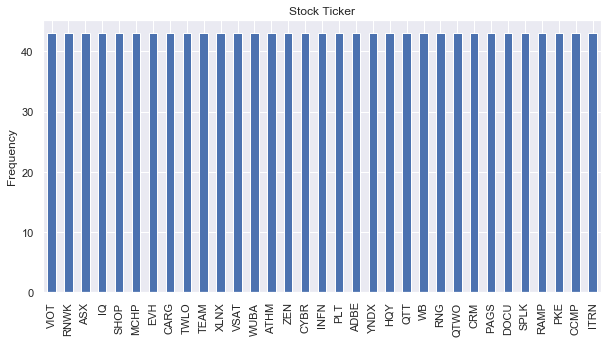

In [104]:
# Plotting a Histogram
df['Symbol'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Stock Ticker')
plt.ylabel('Frequency');
# In this case, I do not see any outliers because every stock symbol has exact the same amount of data.

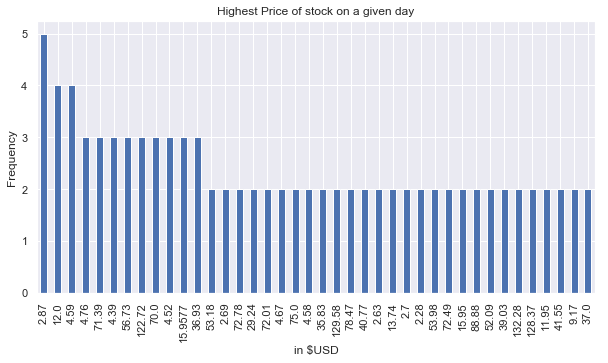

In [105]:
# Plotting a Histogram
df['Highest Price'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Highest Price of stock on a given day')
plt.ylabel('Frequency')
plt.xlabel('in $USD');
# In this case, I see the price at $2.87 occur more frequently then the rest.
# This data should not be removed because it is a real data.
# One explanation for this outlier is because this is a very low price, which causes more trade frequency.

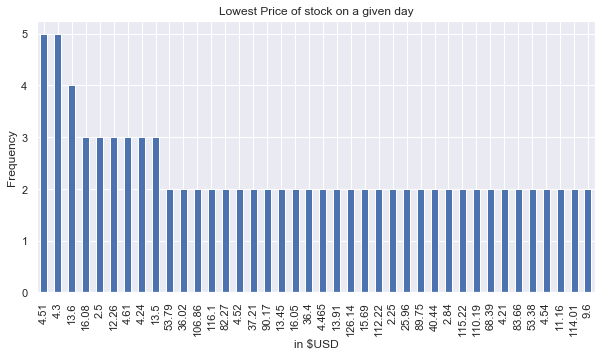

In [106]:
# Plotting a Histogram
df['Lowest Price'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Lowest Price of stock on a given day')
plt.ylabel('Frequency')
plt.xlabel('in $USD');
# In this case, the prices at $4.51 and $4.30 seem to be outliers. These two values are very close.
# these data should not be removed because they are real prices of stock.
# One possible explanation is because they are not too high (not expensive which causes more trades), not too low (which could
# be fallen into penny stock category).

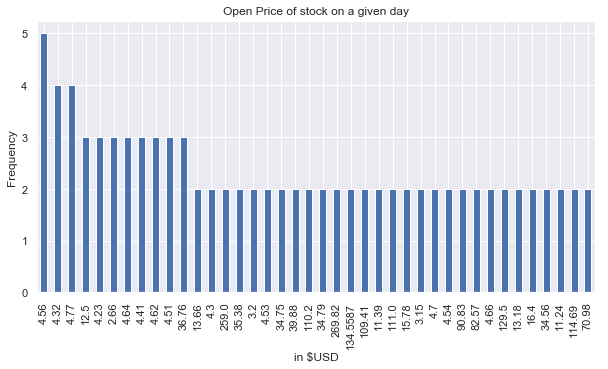

In [107]:
# Plotting a Histogram
df['Open'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Open Price of stock on a given day')
plt.ylabel('Frequency')
plt.xlabel('in $USD');
# Again the outlier seems to appear at $4.56. This case should have similar explanation as the previous case.
# the price is not too low or too high, but it is bottom line a penny stock.

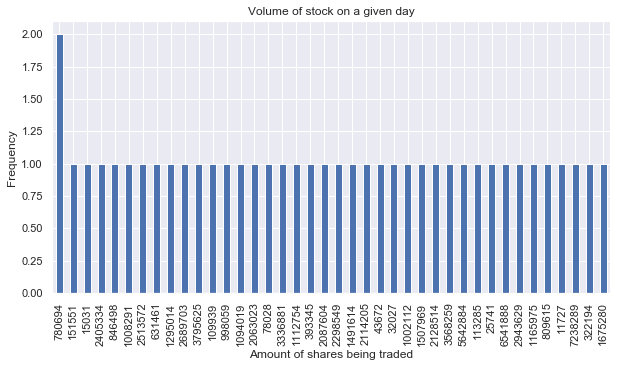

In [108]:
# Plotting a Histogram
df['Volume'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Volume of stock on a given day')
plt.ylabel('Frequency')
plt.xlabel('Amount of shares being traded');
# the outlier occurs at 780,694 shares. This value does not mean much, it is a pure coincidence.

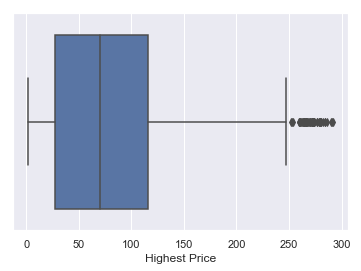

In [109]:
sns.boxplot(x=df['Highest Price'])

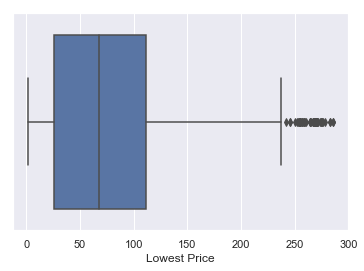

In [110]:
sns.boxplot(x=df['Lowest Price'])

In [111]:
# because I am most interested in the stock SHOP, due to it being the best overall stock
# I want to find more information for SHOP
# Looking at the mean of lowest and highest value, this stock increases from $216 to $224 in about 2 months.
# However, there is a large difference between the lowest point and the highest point (190 to 266).
df['Lowest Price'][387:429].describe()

count     42.000000
mean     216.451710
std       21.068127
min      190.380000
25%      198.751250
50%      211.710000
75%      225.712500
max      257.510000
Name: Lowest Price, dtype: float64

In [112]:
df['Highest Price'][387:429].describe()

count     42.000000
mean     224.253924
std       22.939759
min      198.020000
25%      205.830000
50%      216.630200
75%      242.810050
max      266.720000
Name: Highest Price, dtype: float64

In [113]:
df['Volume'][387:429].describe()

count    4.200000e+01
mean     1.928144e+06
std      1.074986e+06
min      8.103600e+05
25%      1.265155e+06
50%      1.671372e+06
75%      2.078682e+06
max      6.223409e+06
Name: Volume, dtype: float64

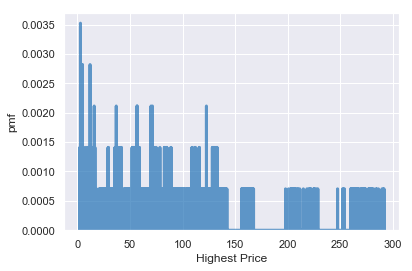

In [114]:
# Create a probability mass function (PMF) for the highest price variable
pmf = thinkstats2.Pmf(df['Highest Price'])
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Highest Price', ylabel='pmf')

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Highest Price', ylabel='pmf')

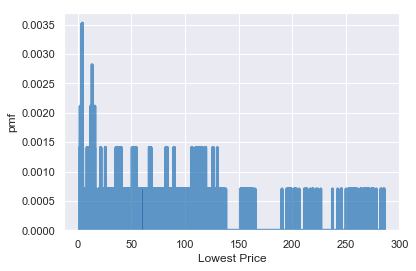

In [115]:
# Create a probability mass function (PMF) for the lowest price variable
pmf = thinkstats2.Pmf(df['Lowest Price'])
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Lowest Price', ylabel='pmf')

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Lowest Price', ylabel='pmf')

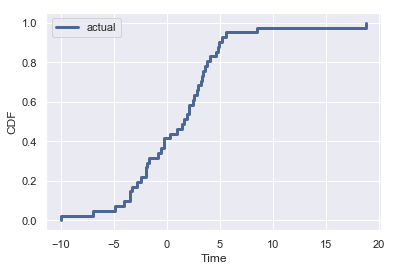

In [116]:
# Create the cumulative distribution function (CDF) for the highest price for the stock SHOP
diffs = df['Highest Price'][387:429].diff()
cdf = thinkstats2.Cdf(diffs, label='actual')


thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Time', ylabel='CDF')

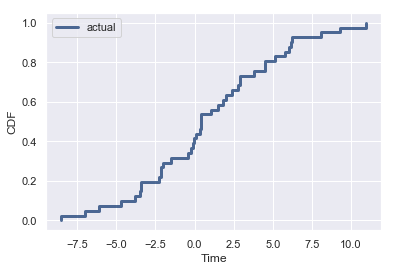

In [117]:
# Create the cumulative distribution function (CDF) for the lowest price for the stock SHOP
diffs = df['Lowest Price'][387:429].diff()
cdf = thinkstats2.Cdf(diffs, label='actual')


thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Time', ylabel='CDF')

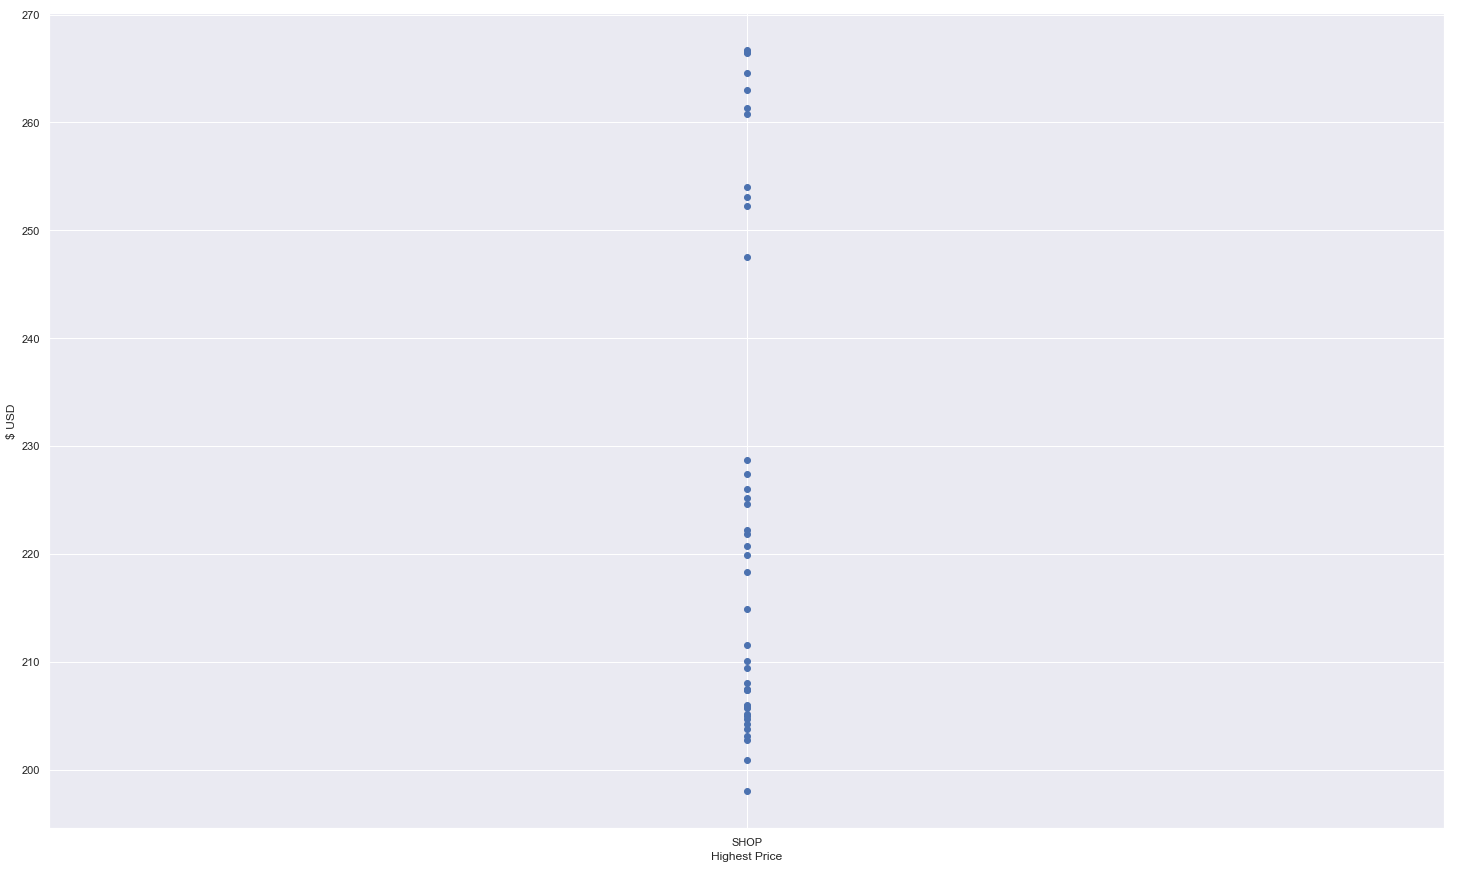

In [118]:
# Plotting a scatter plot for the highest price of SHOP
fig, ax = plt.subplots(figsize=(25,15))
ax.scatter(df['Symbol'][387:429], df['Highest Price'][387:429])
ax.set_xlabel('Highest Price')
ax.set_ylabel('$ USD')
plt.show()

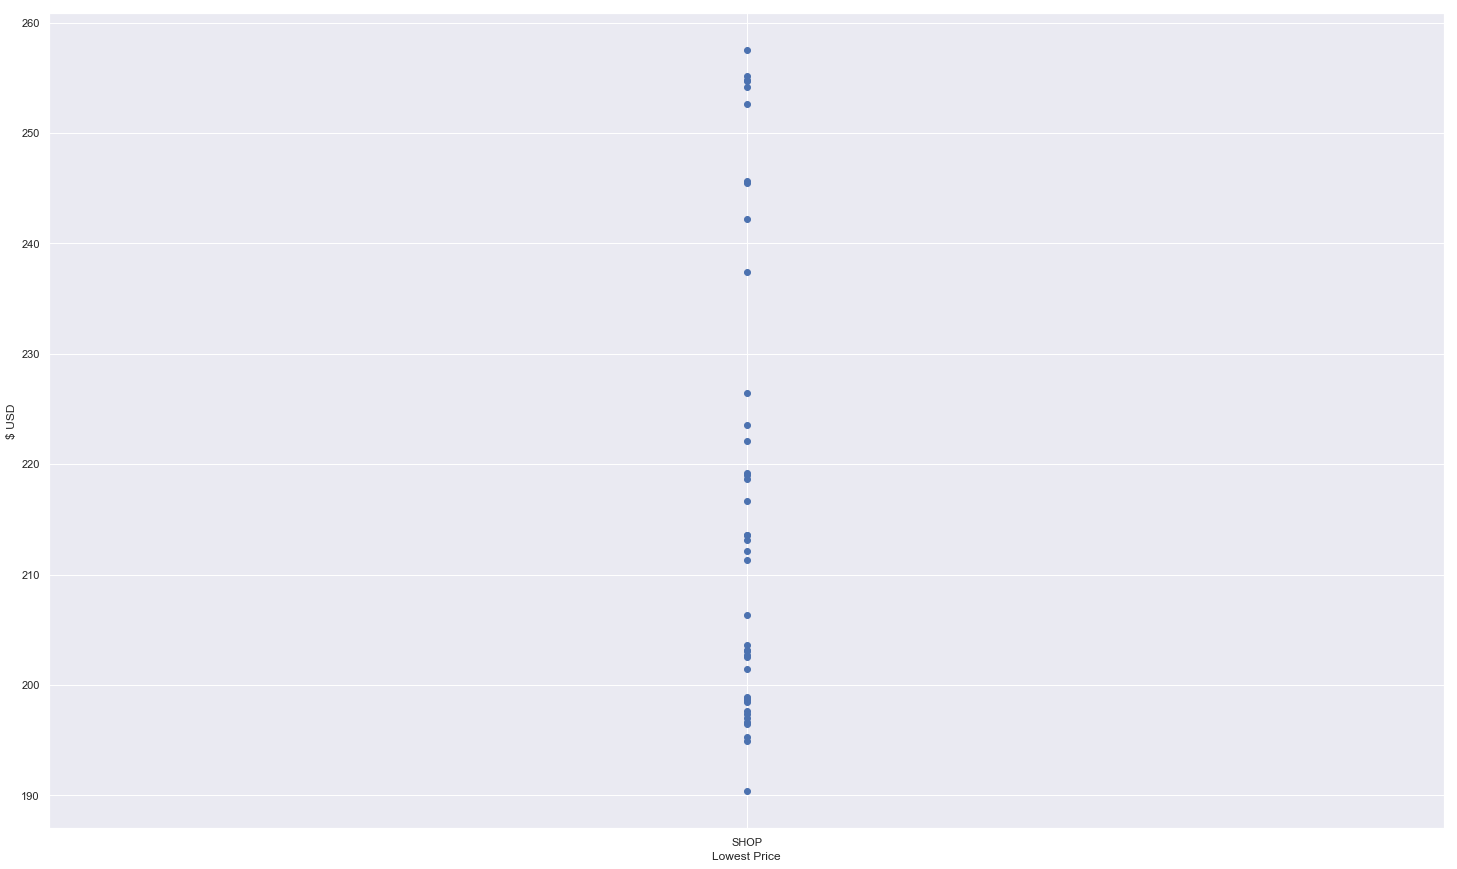

In [119]:
# Plotting a scatter plot for the lowest price of each stock
fig, ax = plt.subplots(figsize=(25,15))
ax.scatter(df['Symbol'][387:429], df['Lowest Price'][387:429])
ax.set_xlabel('Lowest Price')
ax.set_ylabel('$ USD')
plt.show()

In [120]:
# Calculate the covariance of the highest price and the lowest price of stock SHOP
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
Cov(df['Lowest Price'][387:429], df['Highest Price'][387:429])

466.83312744691614

In [121]:
# Calculate the correlation of the highest price and the lowest price of stock SHOP
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
Corr(df['Lowest Price'][387:429], df['Highest Price'][387:429])

0.9894920578504455

In [122]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)
SpearmanCorr(df['Lowest Price'][387:429], df['Highest Price'][387:429])

0.9761769710720363

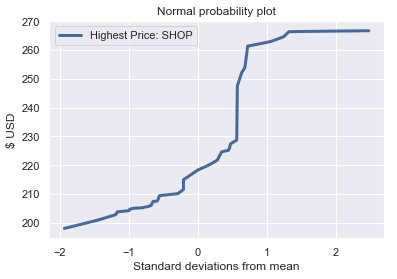

In [123]:
# Plot normal distribution curve for the highest price of SHOP
mean, var = thinkstats2.TrimmedMeanVar(df['Highest Price'][387:429], p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(df['Highest Price'][387:429])
thinkplot.Plot(xs, ys, label='Highest Price: SHOP')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='$ USD')

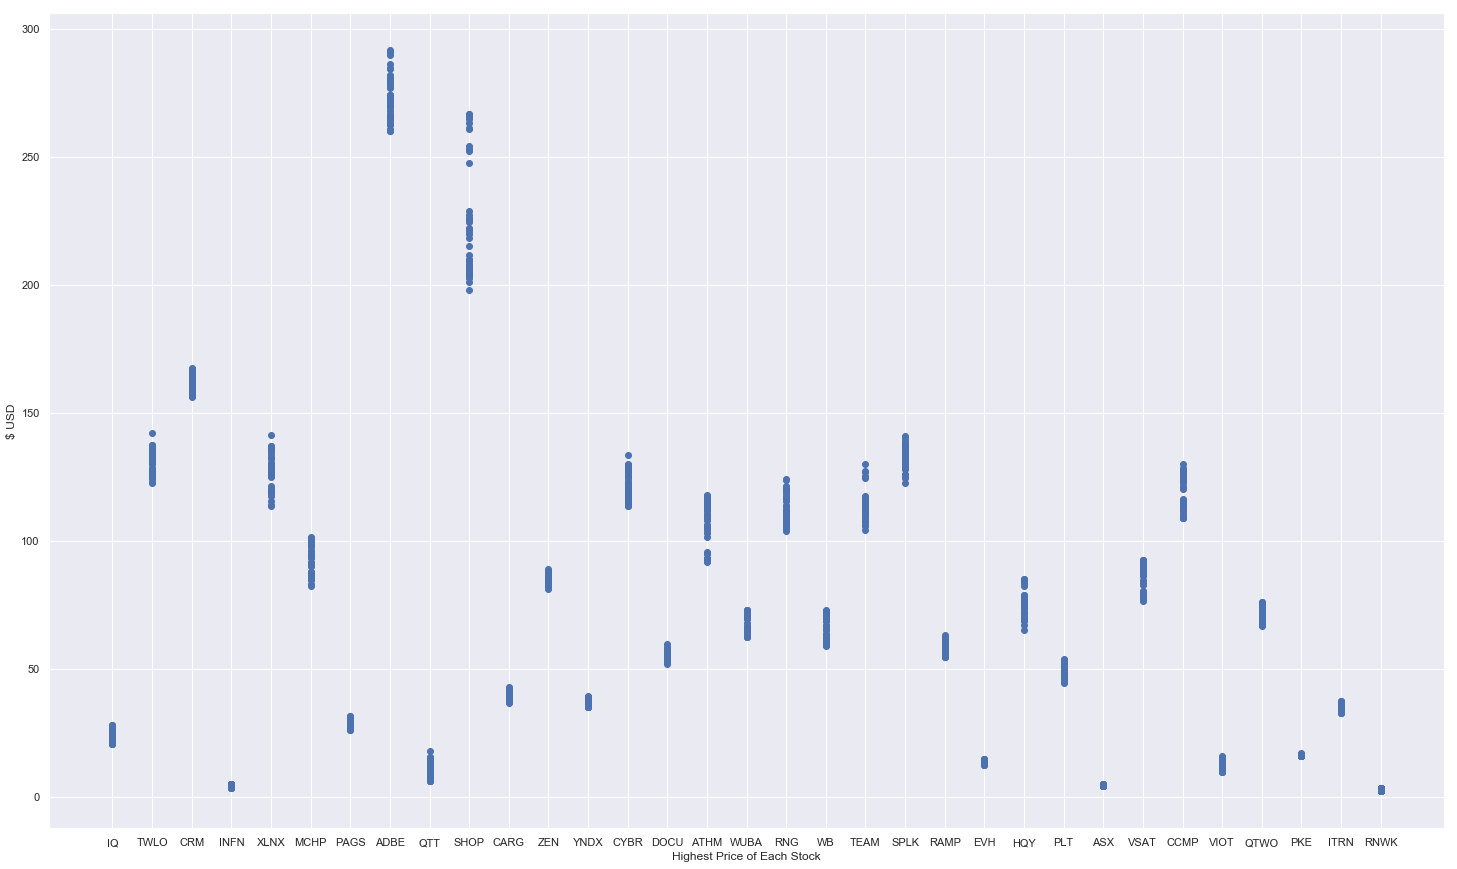

In [124]:
# Plotting a scatter plot for the highest price of each stock
fig, ax = plt.subplots(figsize=(25,15))
ax.scatter(df['Symbol'], df['Highest Price'])
ax.set_xlabel('Highest Price of Each Stock')
ax.set_ylabel('$ USD')
plt.show()

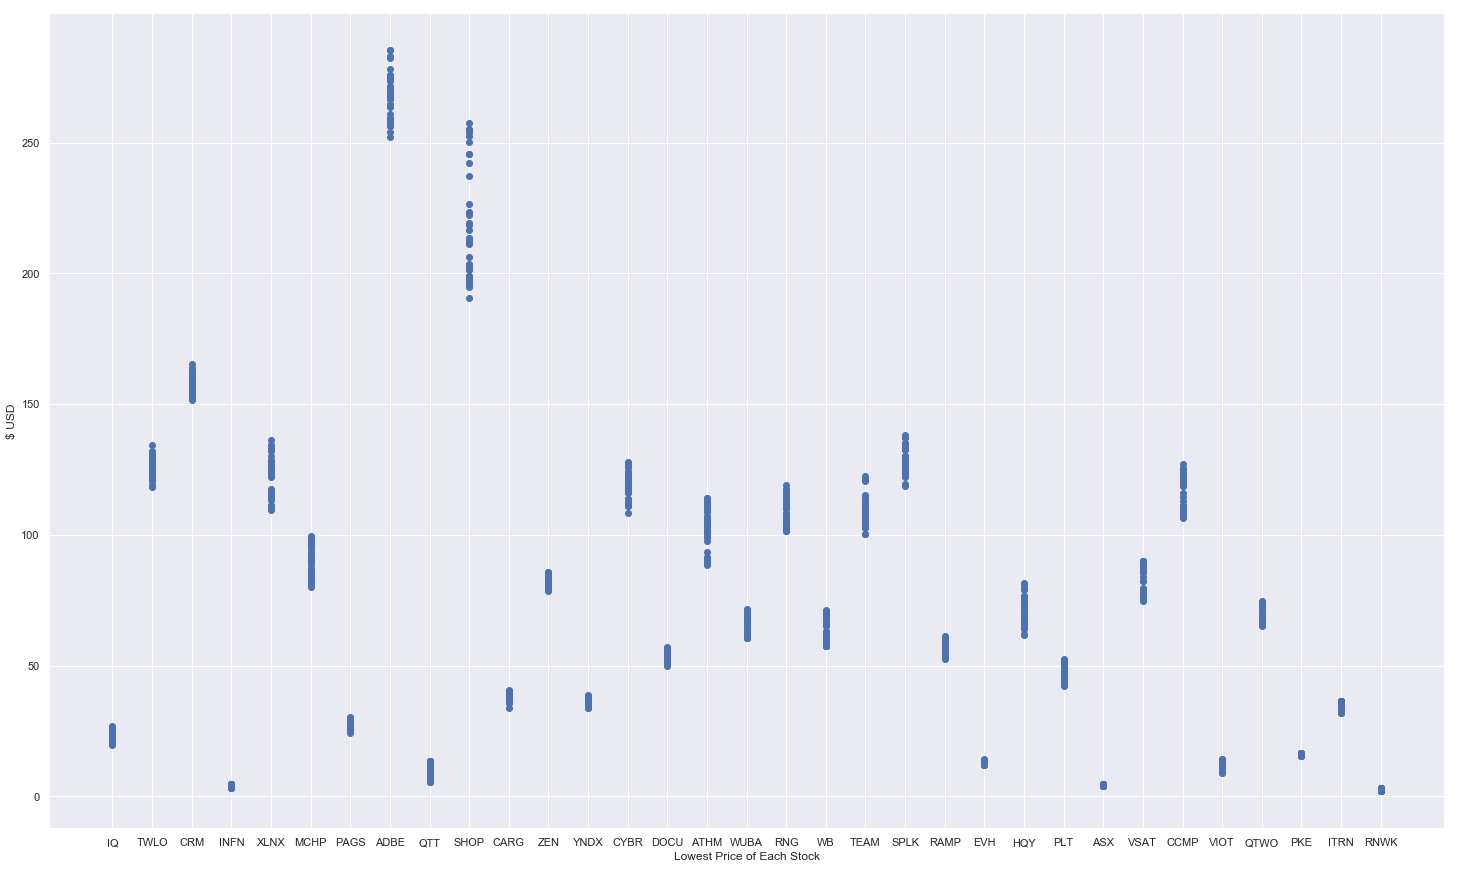

In [125]:
# Plotting a scatter plot for the lowest price of each stock
fig, ax = plt.subplots(figsize=(25,15))
ax.scatter(df['Symbol'], df['Lowest Price'])
ax.set_xlabel('Lowest Price of Each Stock')
ax.set_ylabel('$ USD')
plt.show()

In [126]:
df.diff = df['Highest Price'] - df['Lowest Price']

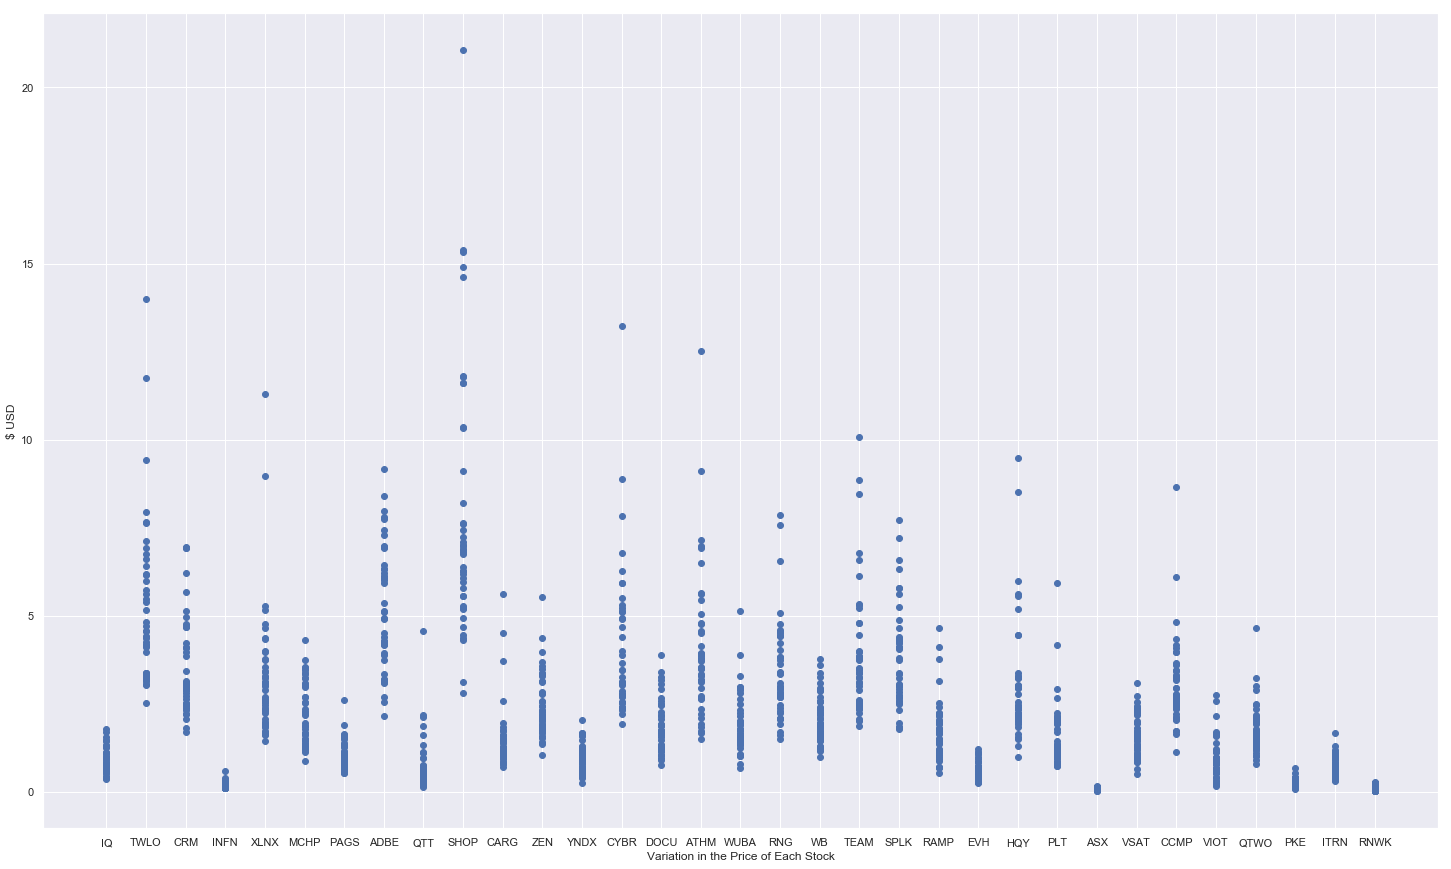

In [127]:
# Plotting a scatter plot for the difference between the highest price and the lowest price of each stock
fig, ax = plt.subplots(figsize=(25,15))
ax.scatter(df['Symbol'], df.diff)
ax.set_xlabel('Variation in the Price of Each Stock')
ax.set_ylabel('$ USD')
plt.show()

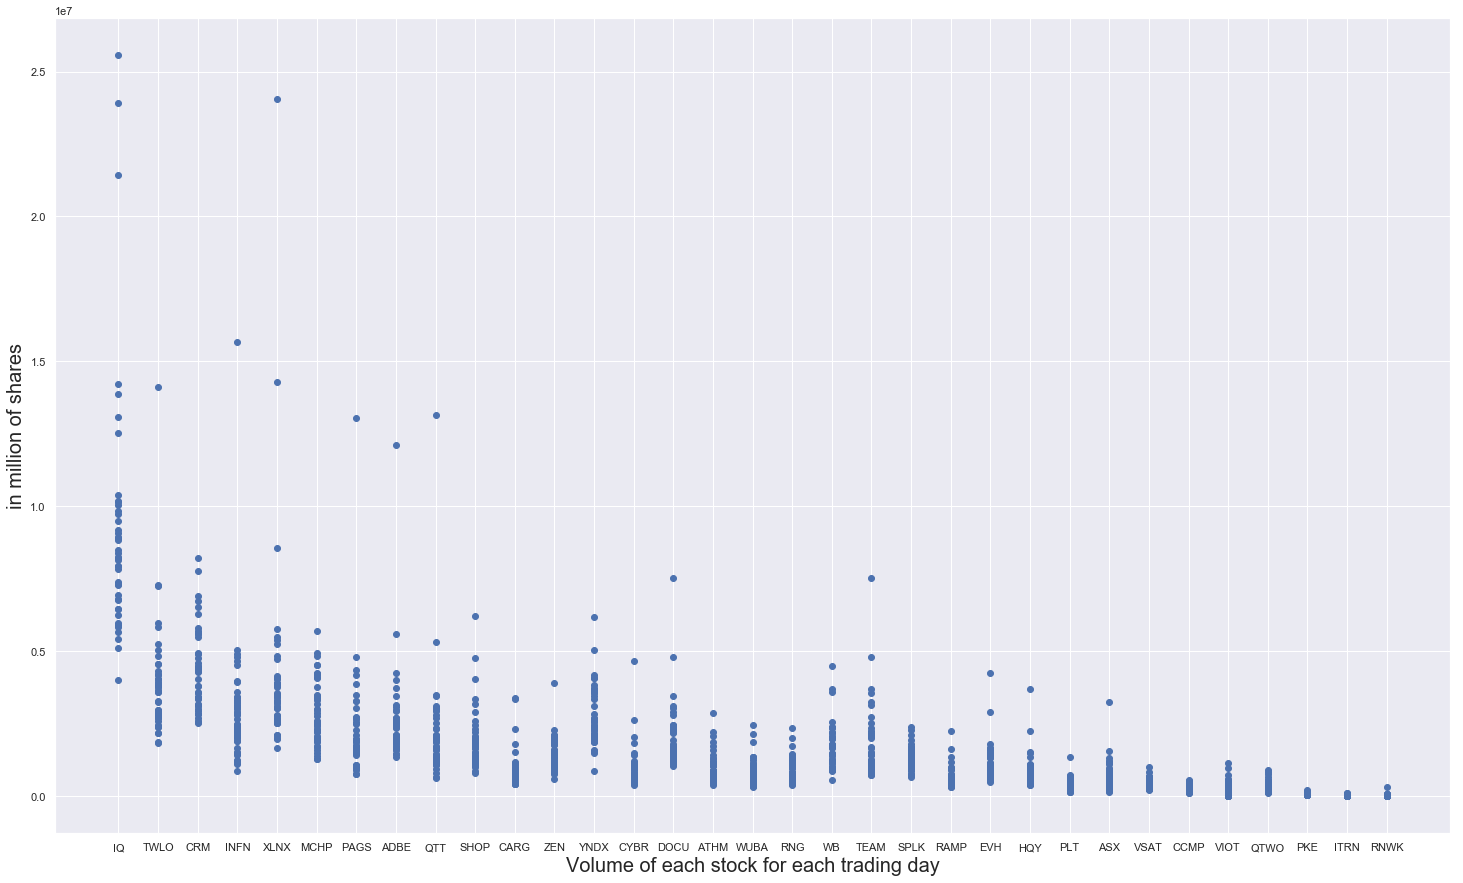

In [128]:
# Plotting the volume of each stock for each trading day
fig, ax = plt.subplots(figsize=(25,15))
ax.scatter(df['Symbol'], (df['Volume']))
ax.set_xlabel('Volume of each stock for each trading day', size = 20)
ax.set_ylabel('in million of shares', size = 20)
plt.show()